In [7]:
pip install pandas numpy matplotlib seaborn scikit-learn shap

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

# Load data
df = pd.read_csv('/Users/avd/Desktop/PROJECTS/TelcoCustomerChurn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Check for missing values
print(df.isnull().sum())

# TotalCharges has some missing values — let’s inspect:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())

# Drop rows with missing TotalCharges
df.dropna(inplace=True)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
11


In [10]:
# customerID is a unique identifier, not useful for modeling
df.drop('customerID', axis=1, inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Binary categorical columns (Yes/No, Male/Female)
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Remaining categorical columns: use one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [12]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  MultipleLines_No phone service         7032 non-null   bool   
 11  MultipleL

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


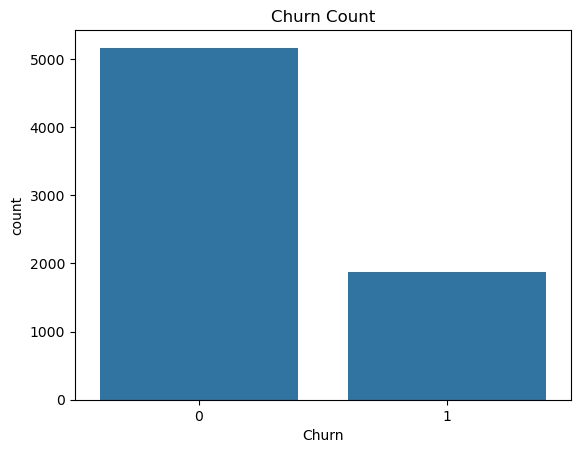

Churn Rate: 26.58%


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class balance
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()

# Churn percentage
churn_rate = df['Churn'].mean()
print(f"Churn Rate: {churn_rate:.2%}")

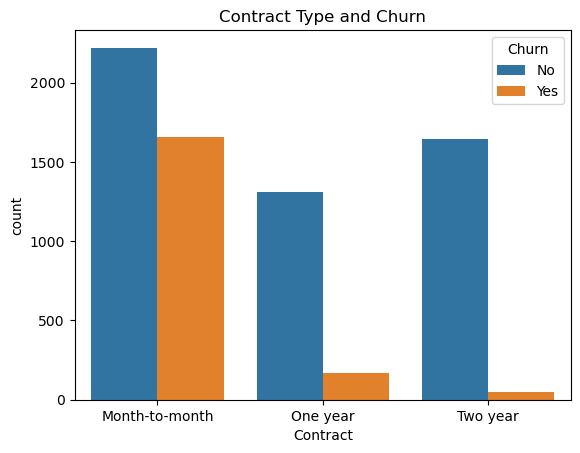

In [14]:
# Contract Type vs Churn
sns.countplot(x='Contract', hue='Churn', data=pd.read_csv('/Users/avd/Desktop/PROJECTS/TelcoCustomerChurn.csv'))
plt.title('Contract Type and Churn')
plt.show()

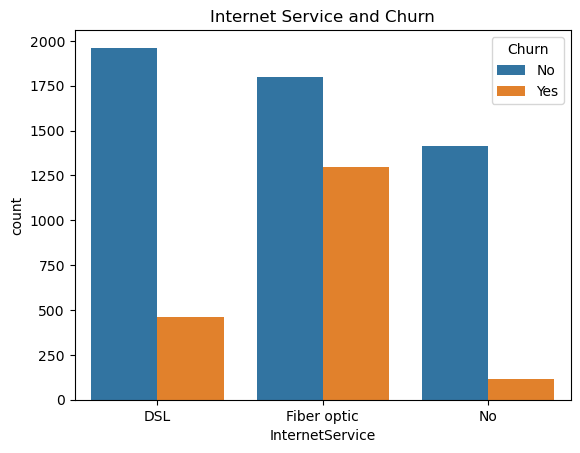

In [15]:
# Contract Type vs Churn
sns.countplot(x='InternetService', hue='Churn', data=pd.read_csv('/Users/avd/Desktop/PROJECTS/TelcoCustomerChurn.csv'))
plt.title('Internet Service and Churn')
plt.show()

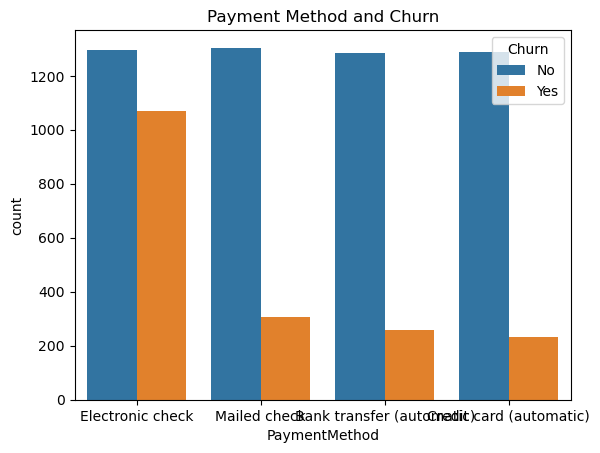

In [16]:
# Contract Type vs Churn
sns.countplot(x='PaymentMethod', hue='Churn', data=pd.read_csv('/Users/avd/Desktop/PROJECTS/TelcoCustomerChurn.csv'))
plt.title('Payment Method and Churn')
plt.show()

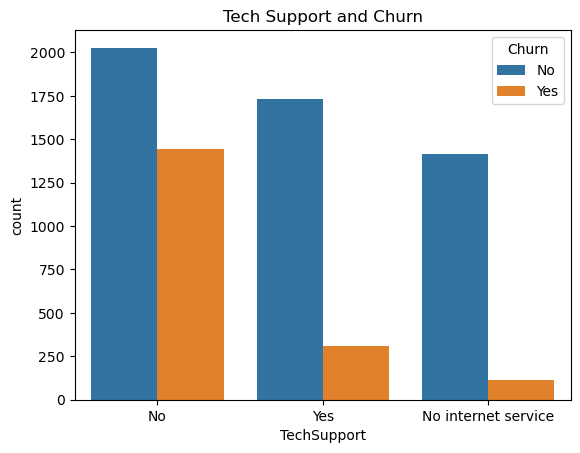

In [17]:
# Contract Type vs Churn
sns.countplot(x='TechSupport', hue='Churn', data=pd.read_csv('/Users/avd/Desktop/PROJECTS/TelcoCustomerChurn.csv'))
plt.title('Tech Support and Churn')
plt.show()

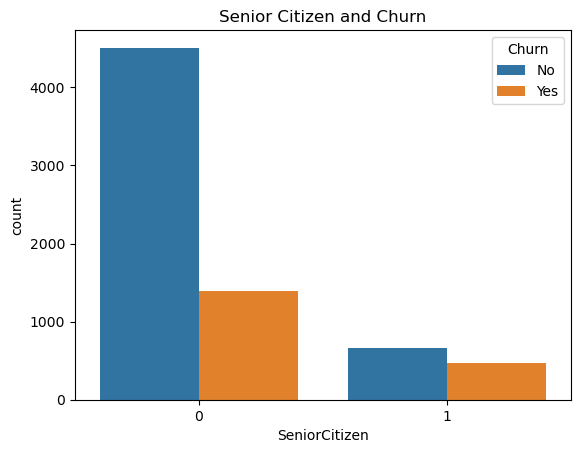

In [18]:
# Contract Type vs Churn
sns.countplot(x='SeniorCitizen', hue='Churn', data=pd.read_csv('/Users/avd/Desktop/PROJECTS/TelcoCustomerChurn.csv'))
plt.title('Senior Citizen and Churn')
plt.show()

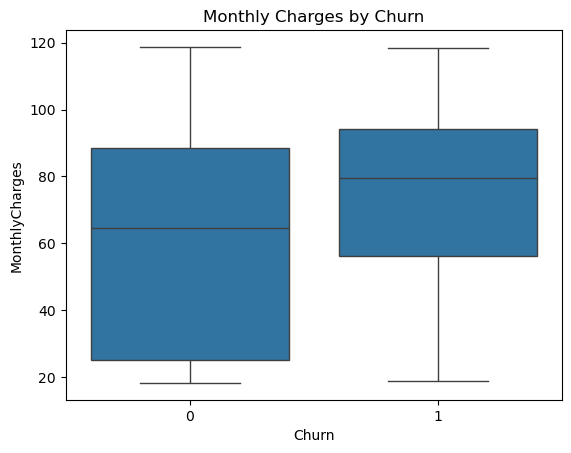

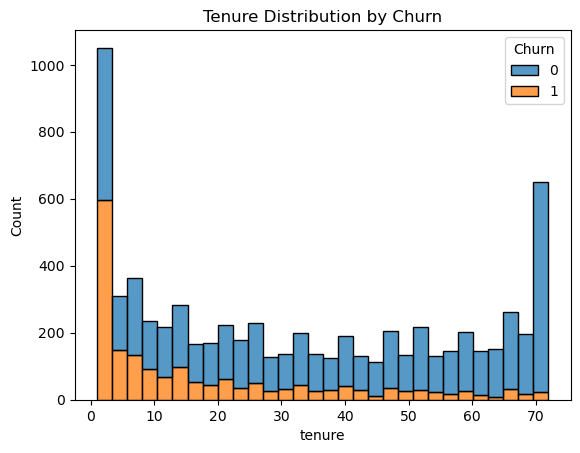

In [19]:
# MonthlyCharges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

# Tenure
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn')
plt.show()


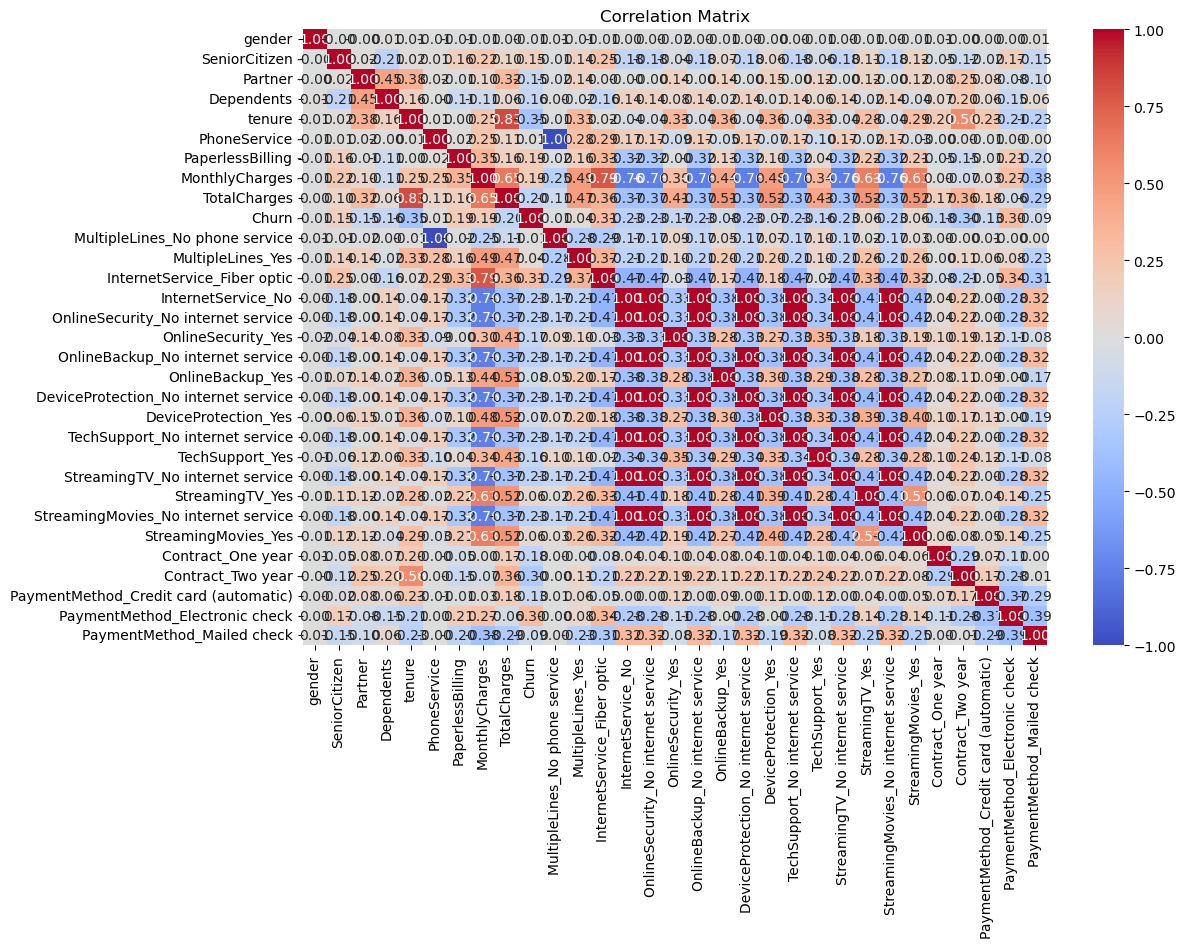

In [20]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.7903340440653873
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



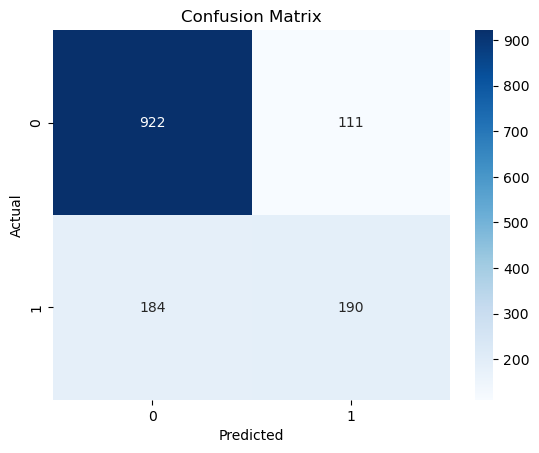

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

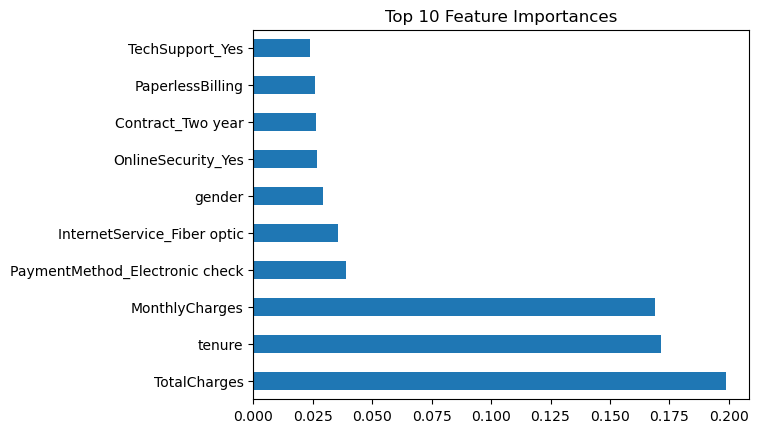

In [24]:
# Feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [25]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7668798862828714
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:32:33] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [26]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [66]:
import shap
import matplotlib.pyplot as plt

In [67]:
# Create SHAP explainer for tree-based models (e.g., Random Forest or XGBoost)
explainer = shap.TreeExplainer(rf_model)  # or xgb_model if using XGBoost
shap_values = explainer.shap_values(X_test)

In [69]:
type(shap_values), len(shap_values), shap_values[0].shape

(numpy.ndarray, 1407, (30, 2))

<Figure size 640x480 with 0 Axes>

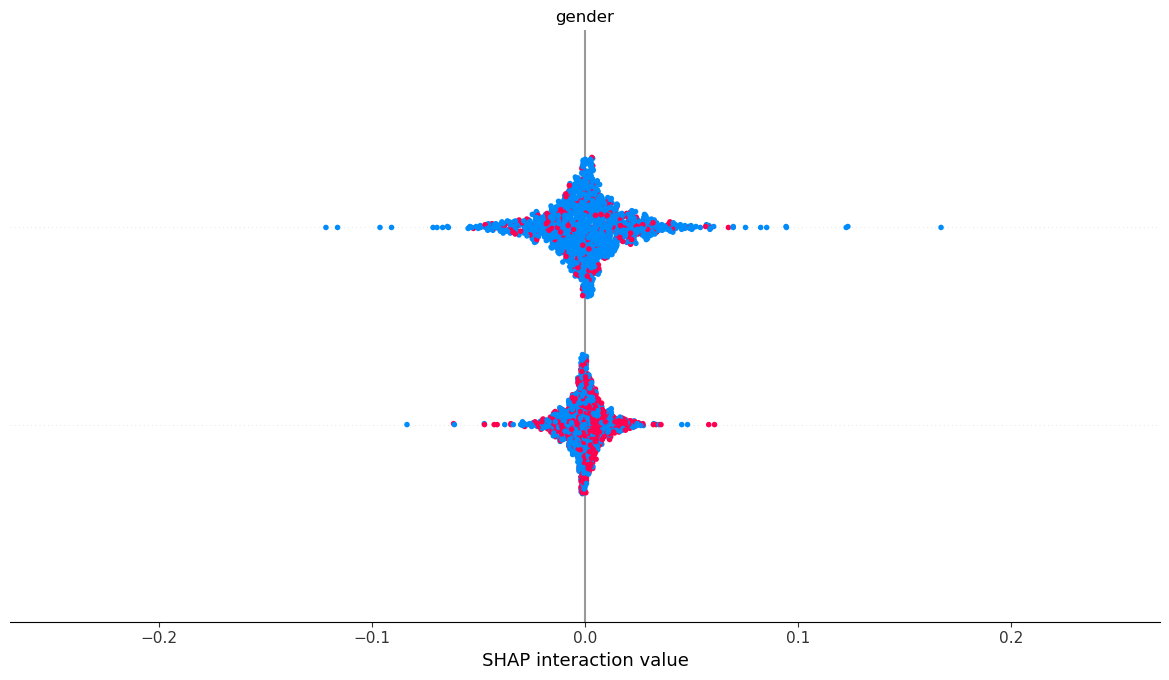

In [70]:
shap.summary_plot(shap_values, X_test)

In [71]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

In [72]:
type(shap_values), len(shap_values), shap_values[0].shape

(numpy.ndarray, 1407, (30,))

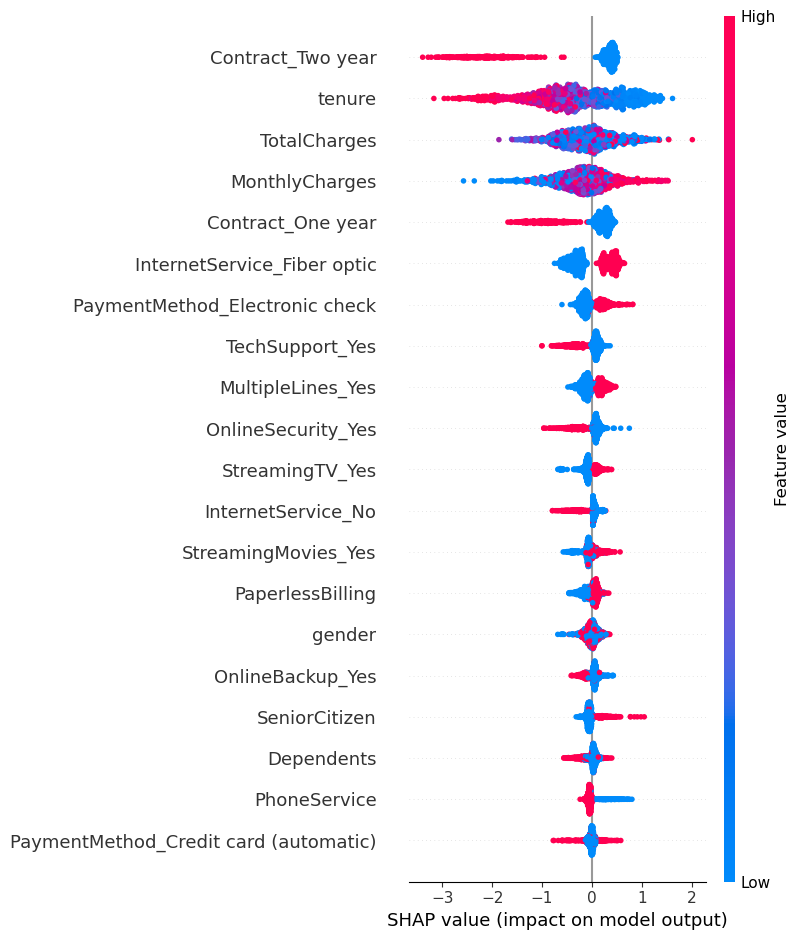

In [75]:
shap.summary_plot(shap_values, X_test)

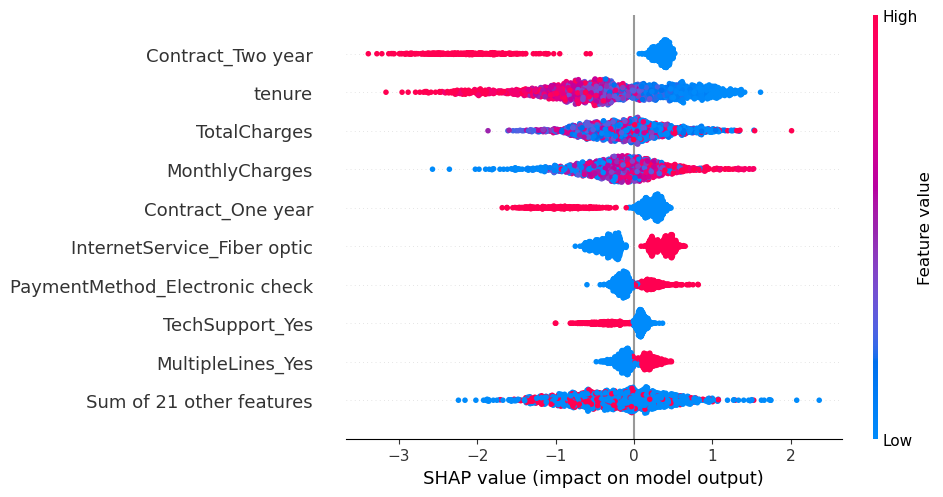

In [74]:
from xgboost import XGBClassifier
import shap

model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)  # No class index needed

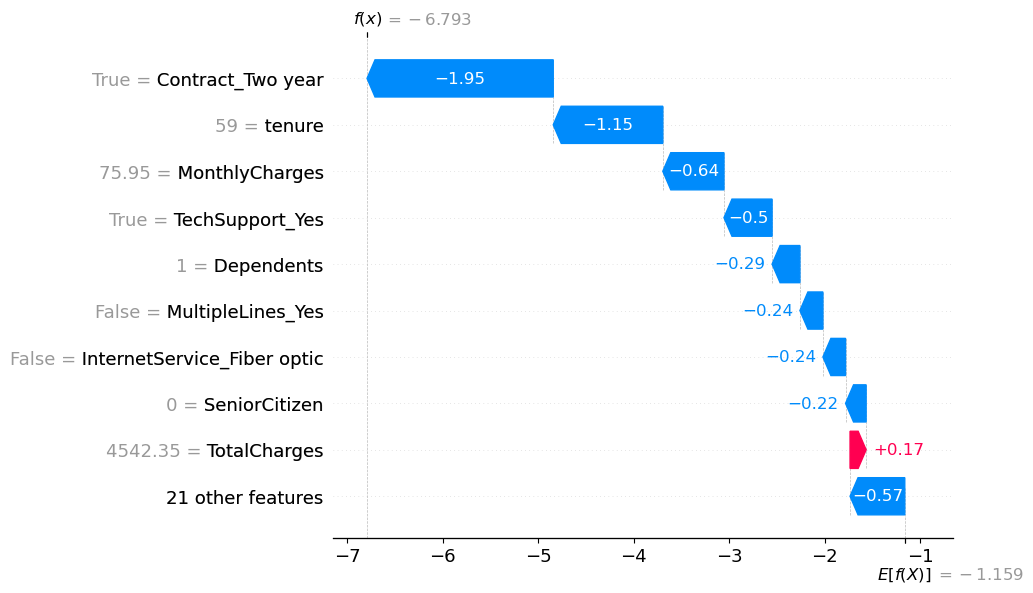

In [81]:
shap.plots.waterfall(shap_values[0])  # for the first row in X_test

In [82]:
pip install --upgrade shap

Note: you may need to restart the kernel to use updated packages.


In [86]:
X_train.dtypes


gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

In [87]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns in case dummy creation misaligns them
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


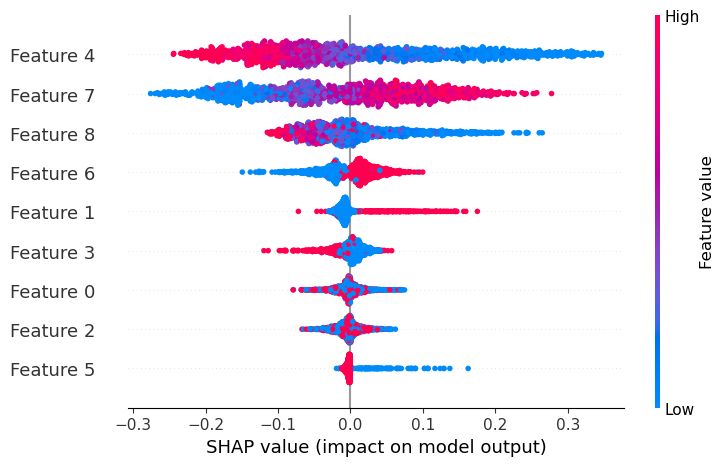

In [90]:
# Choose the SHAP values for class 1 (positive class)
shap.plots.beeswarm(shap_values[:, :, 1])

In [91]:
shap_values.values.shape  # Should be (num_samples, num_features, 2)

(1407, 9, 2)